In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set(style="whitegrid")

### 1. Load Dataset & Initial Overview

In [2]:
# Load dataset
df = pd.read_csv("ILPD.csv")
# Show first 5 rows
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Shape and data types
print("Shape:", df.shape)
df.info()

Shape: (583, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# Renaming columns for better readability
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
              'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
              'Aspartate_Aminotransferase', 'Total_Proteins',
              'Albumin', 'Albumin_and_Globulin_Ratio', 'Liver_Disease']

### 2. Missing Values Handling

In [5]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64

In [6]:
# Fill missing Albumin_and_Globulin_Ratio with median
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [7]:
df.isnull().sum() # now check again for missing values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

### 3. Statistical Summary

In [8]:
# Summary of numerical features
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# Unique values for categorical features
print("Gender values:", df['Gender'].unique())
print("Liver Disease Classes:", df['Liver_Disease'].unique())

Gender values: ['Female' 'Male']
Liver Disease Classes: [1 2]


### 4. Visual Explorations

#### a. Histograms

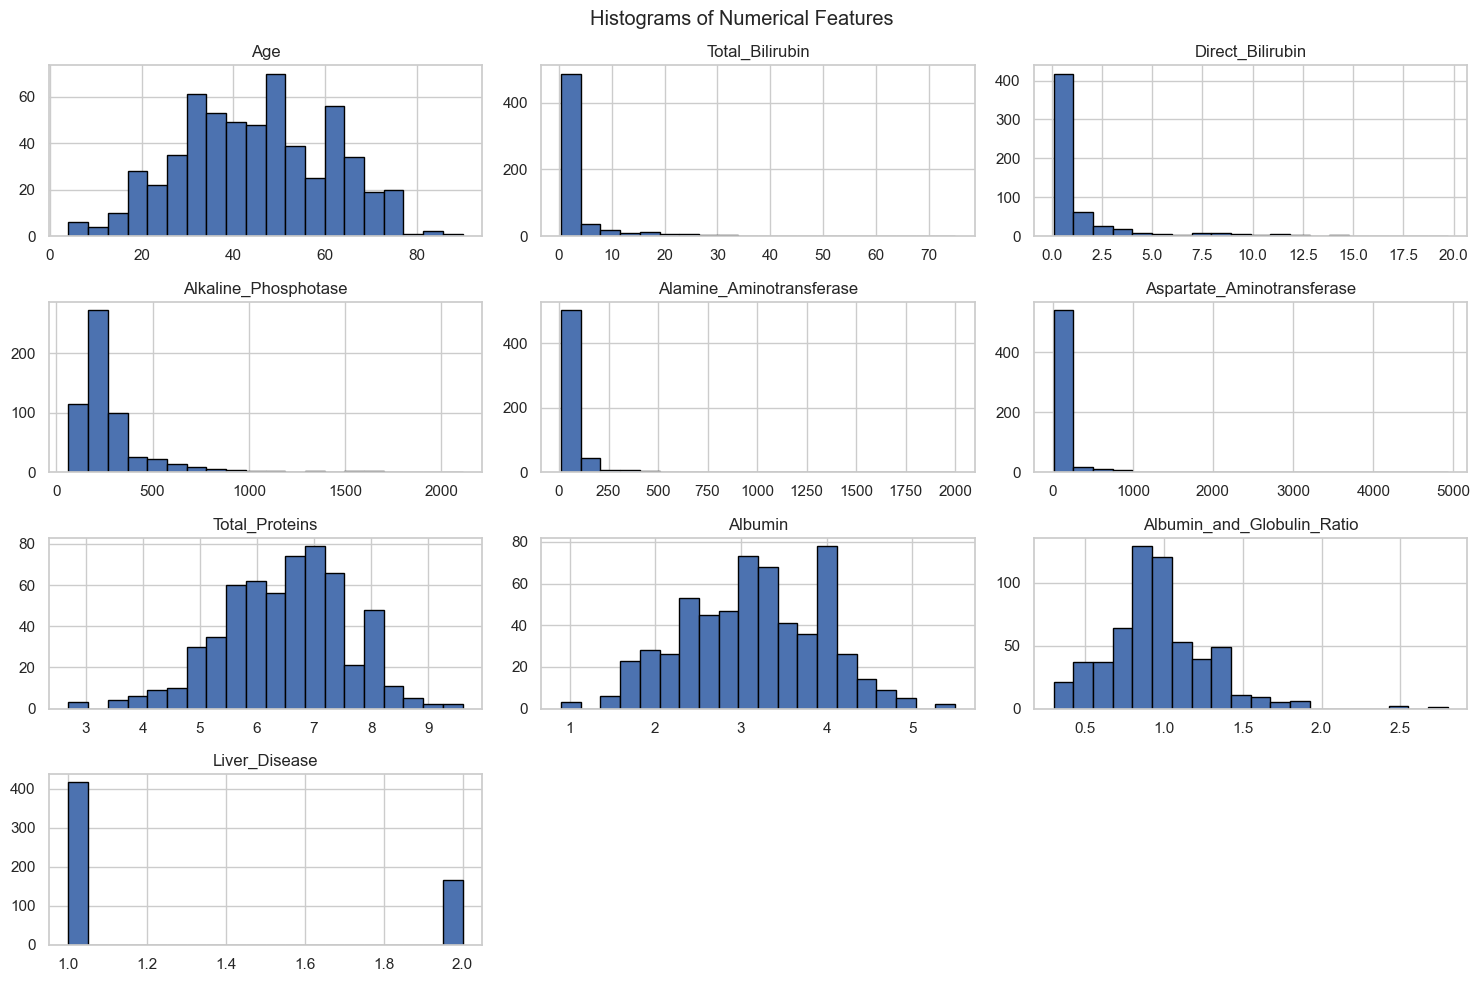

In [10]:
# Distribution of numerical features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

#### b. Count Plots (Categorical)

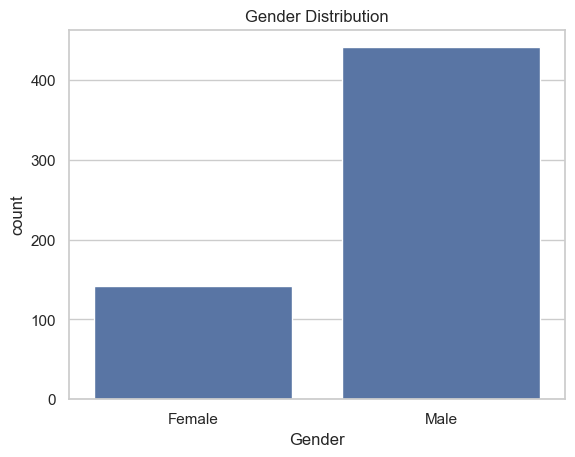

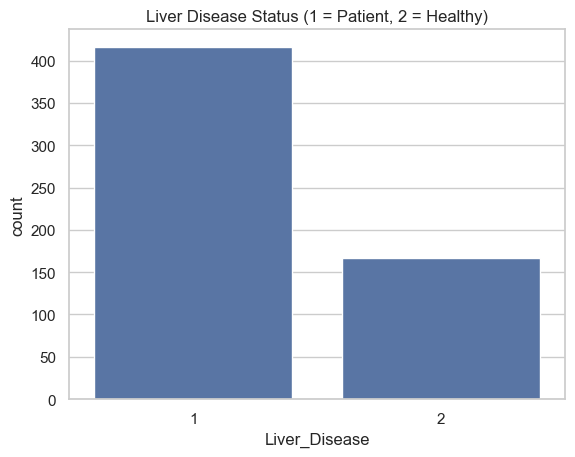

In [11]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

sns.countplot(data=df, x='Liver_Disease')
plt.title("Liver Disease Status (1 = Patient, 2 = Healthy)")
plt.show()

#### c. Correlation Matrix

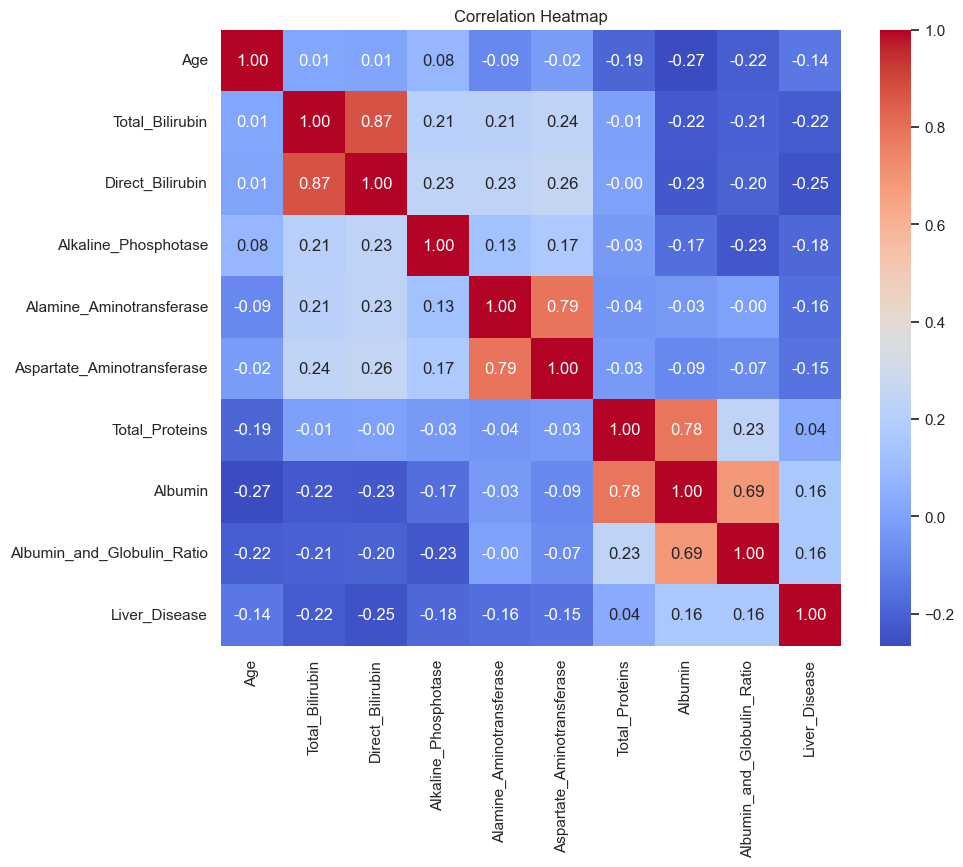

In [12]:
plt.figure(figsize=(10, 8))

# Select only numeric columns before computing correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()

### 5. Outlier Detection using IQR (No scipy)

In [13]:
# Numerical columns to check
numerical_cols = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                  'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

# Function to find outliers based on IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Count and print number of outliers for each column
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


Total_Bilirubin: 84 outliers
Direct_Bilirubin: 81 outliers
Alkaline_Phosphotase: 69 outliers
Alamine_Aminotransferase: 73 outliers
Aspartate_Aminotransferase: 66 outliers
Total_Proteins: 8 outliers
Albumin: 0 outliers
Albumin_and_Globulin_Ratio: 10 outliers


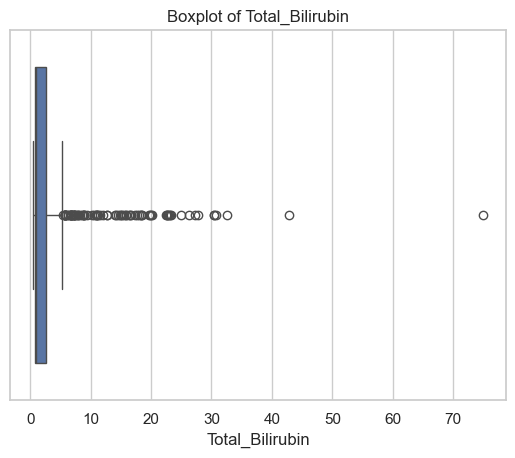

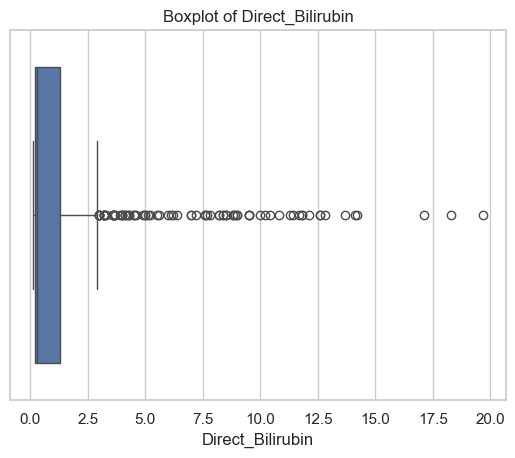

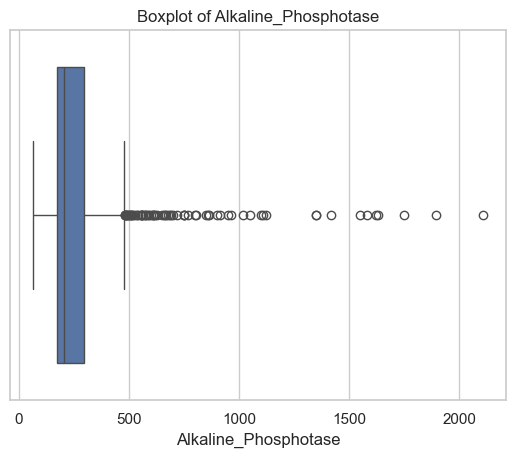

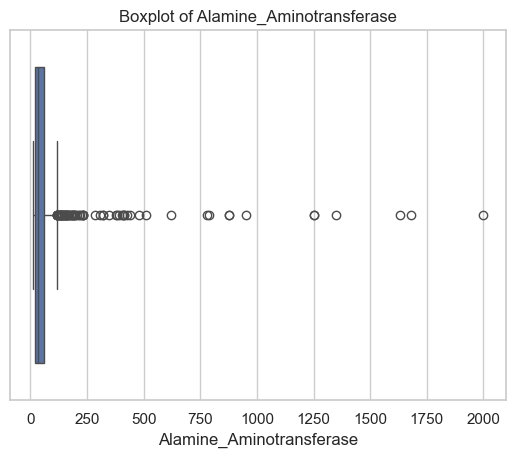

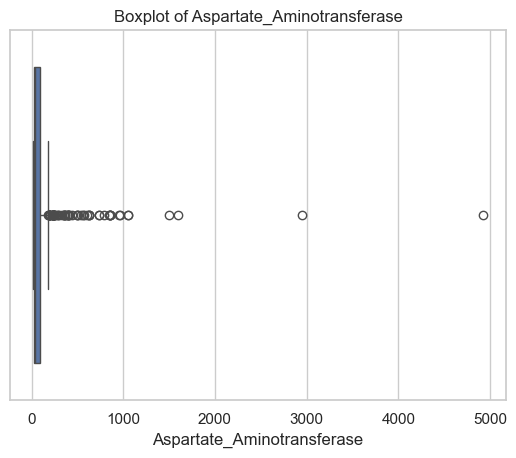

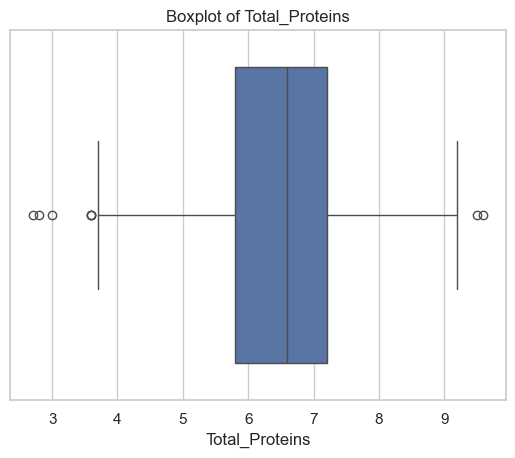

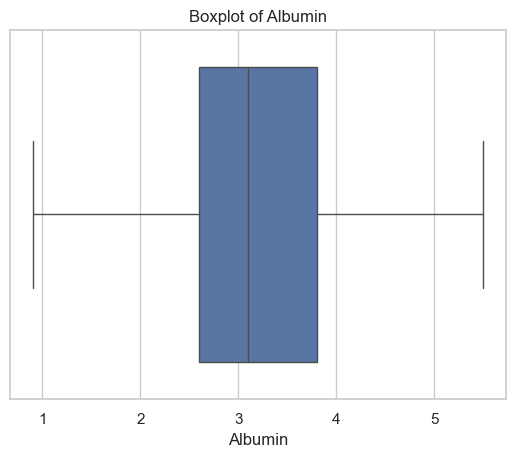

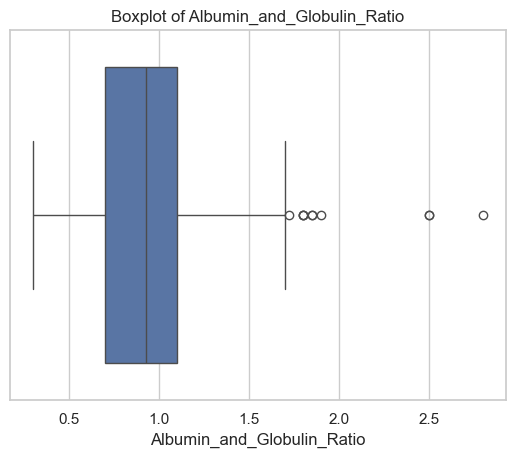

In [14]:
# Boxplot Visualization
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Note: Further steps like handling outliers, feature engineering, and model building can be added as needed.

### 6. Remove Outliers (if needed)

In [15]:
# Remove outliers using IQR for all numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Shape after removing outliers
print("New shape after removing outliers:", df.shape)


New shape after removing outliers: (331, 11)


### Key Insights
1. The dataset originally contained 583 records, mostly males.
2. There were missing values in only one column, which were imputed with the median.
3. Features like Alkaline Phosphotase, Bilirubin levels, and liver enzymes show many outliers and are highly skewed.
4. Correlation heatmap shows strong relationships between some enzymes and bilirubin levels.
5. The class distribution is slightly imbalanced (more liver disease cases).


### Conclusion
1. This EDA gives a strong understanding of the ILPD dataset and its characteristics.
2. We've handled missing values, explored the distribution of features, and detected outliers using the IQR method.
3. These insights are valuable for preparing the data for machine learning models.
4. Next steps: Feature engineering, encoding categorical variables, and model building.
